<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_3_Group_5_Fold.xlsx')
data = data.iloc[:, 1:]
data

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.00,5.562,205.00,69.00,139.00,76.00,36.916,1,good,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.00,5.284,215.00,81.00,123.00,99.00,21.019,1,good,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,100.00,5.300,193.00,62.00,129.00,65.00,30.879,1,good,1
3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,86.00,5.755,219.00,64.00,146.00,73.00,15.198,1,bad,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,88.00,5.500,198.00,74.00,129.00,60.00,28.684,1,bad,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:31.910,...,103.00,5.900,165.00,311.00,84.00,43.00,131.300,1,good,4
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2022-03-14 14:31:53.720,...,99.00,7.100,154.00,196.00,83.00,42.00,325.800,1,good,0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2022-03-05 12:36:33.263,...,123.99,6.457,112.00,96.00,64.00,33.00,104.371,1,bad,1
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2022-03-10 07:42:44.243,...,96.00,5.715,202.31,93.29,136.63,67.35,27.246,1,good,2


In [3]:
data['NATNL'] = data['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})
data['NATNL'].value_counts()

Asian        52447
Non-Asian      173
Name: NATNL, dtype: int64

In [4]:
data = data.sort_values(['PatientUID', 'PatientVisitUID'])
data['TimeDiff'] = data.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data['TimeDiff'] = data['TimeDiff'].fillna(0)

In [5]:
data['time_t1'] = pd.to_datetime(data['time_t1'])

In [6]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data[column].unique())}
    data[column] = data[column].map(encoding_map)

In [7]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data.drop(['Slopes', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'VisitLocation', 'LabLocation','Group','TimeDiff','Fold'], axis=1)
y = data['Slopes']

num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)  # Set shuffle to True

# Get the unique fold values
all_folds = data['Fold'].unique()

X_train_scaled_list = []  # List to store X_train_scaled for each fold
y_train_list = []  # List to store y_train for each fold
X_test_scaled_list = []  # List to store X_test_scaled for each fold
y_test_list = []  # List to store y_test for each fold

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    # Store the scaled data for each fold
    X_train_scaled_list.append(X_train_scaled)
    y_train_list.append(y_train)
    X_test_scaled_list.append(X_test_scaled)
    y_test_list.append(y_test)

# Access the X_train_scaled and y_train for each fold
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
    zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices

    print(f"Fold {fold + 1}:")
    print(f"Training set size : {X_train_scaled_fold.shape}")
    print(f"Test set size: {X_test_scaled_fold.shape}")
    print(f"Folds in training set: {train_folds.tolist()}")
    print(f"Folds in test set: {test_fold}")
    print("---\n")

Fold 1:
Training set size : (42274, 72)
Test set size: (10346, 72)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Fold 2:
Training set size : (41978, 72)
Test set size: (10642, 72)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Fold 3:
Training set size : (42184, 72)
Test set size: (10436, 72)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Fold 4:
Training set size : (42027, 72)
Test set size: (10593, 72)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Fold 5:
Training set size : (42017, 72)
Test set size: (10603, 72)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---



In [8]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(42017, 72)
(10603, 72)
(42017,)
(10603,)


In [9]:
X = data.drop(['Slopes','time_t1','StartDTTM','EndDttm','LabCwhen'], axis=1)
y = data['Slopes']
X.columns

Index(['PatientUID', 'PatientVisitUID', 'InPatient', 'OutPatient', 'Emergency',
       'eGFR_t1', 'VisitLocation', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

## **model**

In [24]:
num_folds = 5  # Specify the number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

# Get the unique fold values
all_folds = data['Fold'].unique()

# Initialize lists to store metrics for each fold
loss_per_fold = []
all_train_loss = []
all_val_loss = []

for fold, (train_folds, test_fold) in enumerate(kf.split(all_folds)):
    train_folds = all_folds[train_folds]
    test_fold = all_folds[test_fold][0]

    # Select rows with the corresponding folds
    train_indices = data['Fold'].isin(train_folds)
    test_indices = data['Fold'] == test_fold

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

    # Define the model architecture with Batch Normalization and Dropout
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    # Implement early stopping
    #early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Fit data to model with early stopping
    history = model.fit(X_train_scaled, y_train,
                    batch_size=500,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test_scaled, y_test))
                    #callbacks=[early_stopping])

    # Generate generalization metrics
    scores = model.evaluate(X_test_scaled, y_test, verbose=0)

    print(f'Score for fold {fold + 1}: {model.metrics_names[0]} = {scores[0]}; {model.metrics_names[1]} = {scores[1]}')
    loss_per_fold.append(scores[0])

    # Store training and validation loss values for plotting
    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

# Print average metrics across all folds
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'Mean Loss: {sum(loss_per_fold) / len(loss_per_fold)}')

Epoch 1/20
85/85 [==============================] - 2s 13ms/step - loss: 64.0160 - mae: 5.2593 - val_loss: 31.8949 - val_mae: 3.5343
Epoch 2/20
85/85 [==============================] - 1s 10ms/step - loss: 31.8958 - mae: 3.7220 - val_loss: 19.2670 - val_mae: 2.5908
Epoch 3/20
85/85 [==============================] - 1s 10ms/step - loss: 23.4541 - mae: 3.0382 - val_loss: 15.3673 - val_mae: 2.2071
Epoch 4/20
85/85 [==============================] - 1s 10ms/step - loss: 20.5770 - mae: 2.7735 - val_loss: 14.7345 - val_mae: 2.1461
Epoch 5/20
85/85 [==============================] - 1s 11ms/step - loss: 19.2107 - mae: 2.6374 - val_loss: 14.0964 - val_mae: 2.0959
Epoch 6/20
85/85 [==============================] - 1s 11ms/step - loss: 18.0739 - mae: 2.5375 - val_loss: 13.6618 - val_mae: 2.0076
Epoch 7/20
85/85 [==============================] - 1s 14ms/step - loss: 17.3057 - mae: 2.4696 - val_loss: 12.7001 - val_mae: 2.0152
Epoch 8/20
85/85 [==============================] - 1s 11ms/step - lo

## **plot**

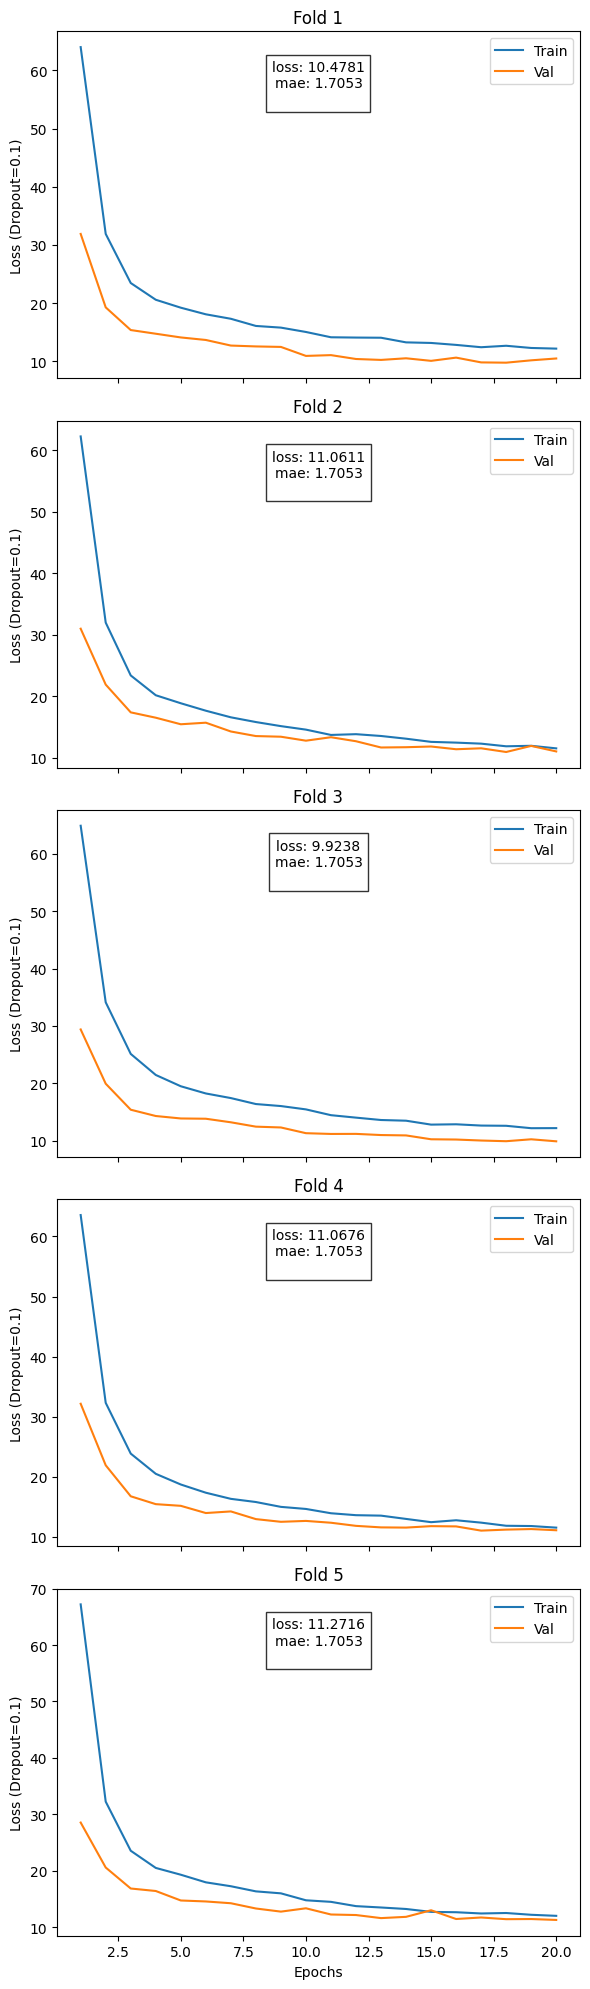

In [25]:
import matplotlib.pyplot as plt
import numpy as np

num_epochs = len(all_train_loss[0])
num_folds = len(all_train_loss)

fig, axs = plt.subplots(num_folds, 1, figsize=(6, 4 * num_folds), sharex=True)

for i in range(num_folds):
    train_line, = axs[i].plot(range(1, num_epochs + 1), all_train_loss[i], label='Train')  # , linestyle='-' , marker='o', color='blue')
    val_line, = axs[i].plot(range(1, num_epochs + 1), all_val_loss[i], label='Val')  # , linestyle='-', marker='x', color='red')

    axs[i].set_title(f'Fold {i + 1}')
    plt.xlabel('Epochs')
    axs[i].set_ylabel('Loss (Dropout=0.1)')
    axs[i].legend(loc='upper right')

    axs[i].text(0.5, 0.85, f'{model.metrics_names[0]}: {loss_per_fold[i]:.4f}\n'
                           f'{model.metrics_names[1]}: {scores[1]:.4f}\n',
                horizontalalignment='center', verticalalignment='center',
                transform=axs[i].transAxes, bbox=dict(facecolor='white', alpha=0.8))

axs[num_folds - 1].set_xlabel('Epochs')
plt.tight_layout()
plt.show()


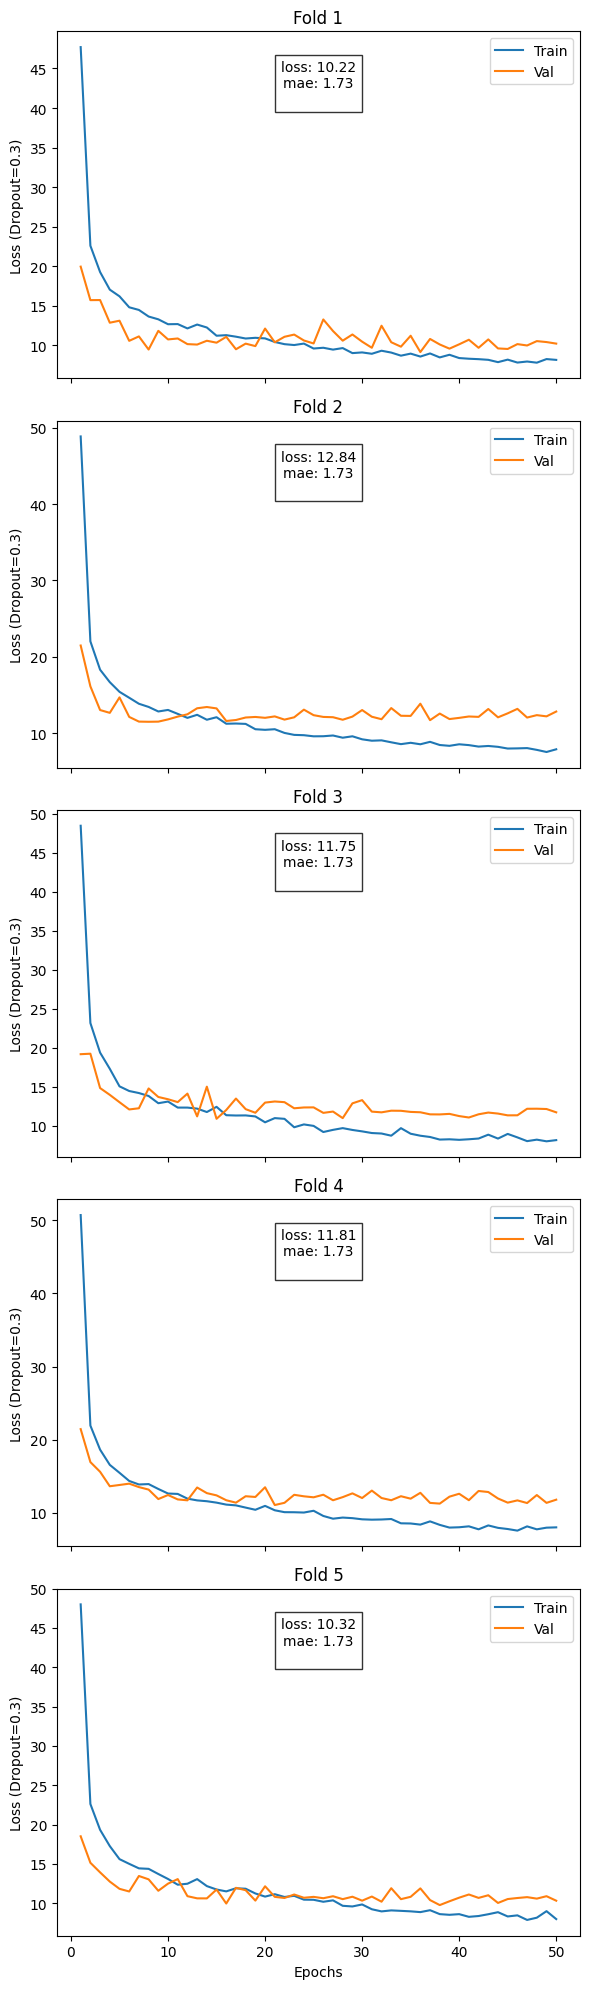

In [13]:
import matplotlib.pyplot as plt
import numpy as np

num_epochs = len(all_train_loss[0])

for i in range(num_folds):
    plt.figure(figsize=(6, 4))
    train_line, = plt.plot(range(1, num_epochs + 1), all_train_loss[i], label='Train')#, linestyle='-' , marker='o', color='blue')
    val_line, = plt.plot(range(1, num_epochs + 1), all_val_loss[i], label='Val')#, linestyle='-', marker='x', color='red')

    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.text(0.5, 0.85, f'{model.metrics_names[0]}: {loss_per_fold[i]:.2f}\n'
                        f'{model.metrics_names[1]}: {scores[1]:.2f}\n',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

    plt.show()


## **mynote**

รันครั้งแรกด้วย linear น้องกระโดดจากหลุมบะได้ แสดงว่า
- learning rate 0.01 มากไป ต้องลดลงอีก
- หรือลองลด / เพิ่ม layer model
- พอแก้ ให้ train loss plot smooth แล้วก็ลองดูจาก epoch ว่าที่ประมาณเท่าไหร่ ที่พล็อตมันจะสวย

**Ideal curve**
*   The plot of training loss decreases to a point of stability.
*   The plot of validation loss decreases to a point of stability.
*   The generalization gap is minimal (nearly zero in an ideal situation).


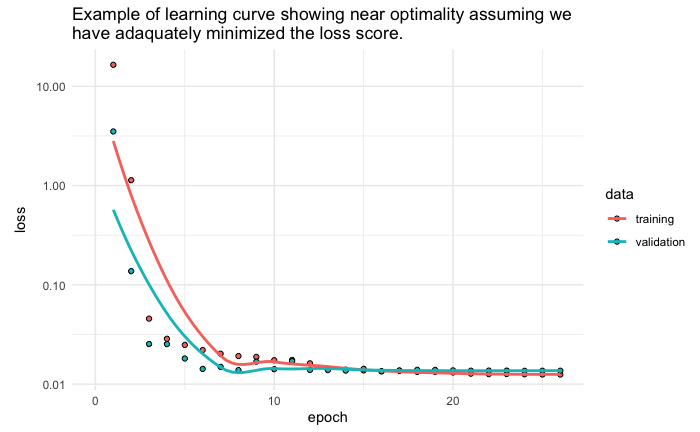


**right now we got aproblem like**
 * Information leakage where a feature in the training data has direct ties to observations and responses in the validation data (i.e. patient ID).
 * Poor sampling procedures where duplicate observations exist in the training and validation datasets.
 * Validation dataset contains features with less variance than the training dataset.

**to solve this**
 * Check to make sure duplicate observations do not exists across training and validation datasets.
 * Check to make sure there is no information leakage across training and validation datasets.
 * Make sure that you are randomly sampling observations to use in your training and validation sets so that feature variance is consistent across both sets. [ℹ️](https://rstudio-conf-2020.github.io/dl-keras-tf/notebooks/01-word-embeddings.nb.html#model-training)
 * Perform cross-validation so that all your data has the opportunity to be represented in both the training and validation sets. [ℹ️](https://rstudio-conf-2020.github.io/dl-keras-tf/notebooks/validation-procedures.nb.html)